In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

C:\Users\Lales\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lales\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Lales\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

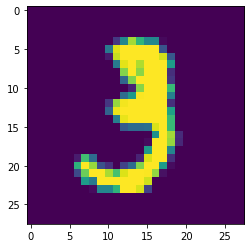

In [3]:
single_image = x_train[10]
plt.imshow(single_image)

In [4]:
#y_cat_test = to_categorical(y_test,10)
#y_cat_train = to_categorical(y_train,10)

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)
x_train=x_train / 255.0
x_test=x_test / 255.0

In [36]:
def model_creating():
    model = tf.keras.models.Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [37]:
model=model_creating()
model.summary()
early_stop = EarlyStopping(monitor='val_loss',patience=1)
model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),callbacks=[early_stop])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 1600)              0         
                                                                 
 dense_24 (Dense)            (None, 128)             

In [39]:
#model.save_weights('MODELS/mnist/digit')
#model.save('MODELS/mnist/digit.h5')
#tfjs.converters.save_keras_model(model,"MODELS/mnist/models")

In [40]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.215526,0.933800,0.052655,0.9836
1,0.080318,0.977083,0.035340,0.9872
2,0.060091,0.981850,0.028121,0.9903
3,0.048679,0.985200,0.028252,0.9902


<AxesSubplot:>

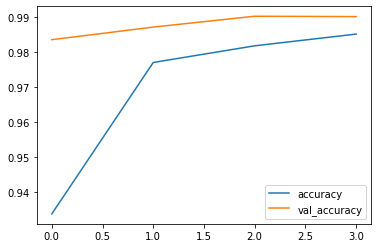

In [41]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

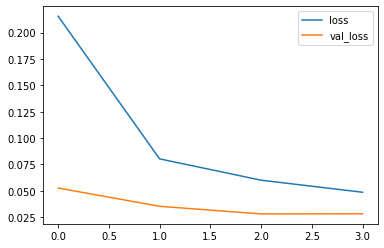

In [42]:
losses[['loss','val_loss']].plot()

In [44]:
print(model.metrics_names)
print(model.evaluate(x_test,y_test,verbose=0))

['loss', 'accuracy']
[0.028252242133021355, 0.9901999831199646]


5

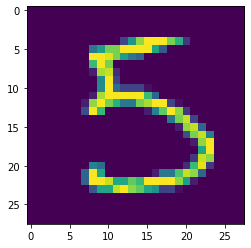

In [75]:
sample_test=x_test[15]
plt.imshow(sample_test.reshape(28,28))
np.argmax(model.predict(sample_test.reshape(1,28,28,1)),axis=1)[0]